# Dwilaras Athina
## German Credit Case 
#### 9th September 2019 | no dropping missing value, no splitting datasetA & datasetB with K-Means Clustering

In [1]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Step 2. Memanggil dataset 
dataset = pd.read_csv('german_credit_data.csv')
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Note
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

## Exploratory Data Analysis

In [418]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [16]:
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [3]:
#fill missing value with 
dataset=dataset.fillna('defaultfill')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [8]:
dataset.Age.value_counts()

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64

In [32]:
dataset['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Text(0.5,0,'AGE')

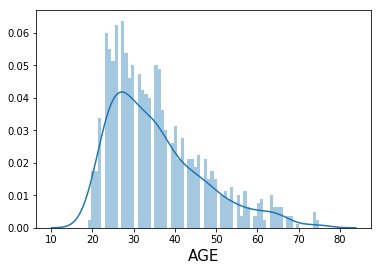

In [11]:
# Distribution of Age
a=sns.distplot(dataset.Age, bins=70)
a.set_xlabel("AGE", fontsize=15)

In this case, we will not consider about Saving account, Checking account, and Sex.

In [4]:
data=dataset.drop(columns=['Unnamed: 0'])
dataset=dataset.drop(columns=['Unnamed: 0','Checking account','Saving accounts','Sex'])

In [21]:
dataset.head()

,Age,Job,Housing,Credit amount,Duration,Purpose
0,67,2,own,1169,6,radio/TV
1,22,2,own,5951,48,radio/TV
2,49,1,own,2096,12,education
3,45,2,free,7882,42,furniture/equipment
4,53,2,free,4870,24,car


## Data Preparation 

In [5]:
df=dataset.drop(columns=['Job','Housing'])
df

,Age,Credit amount,Duration,Purpose
0,67,1169,6,radio/TV
1,22,5951,48,radio/TV
2,49,2096,12,education
3,45,7882,42,furniture/equipment
4,53,4870,24,car
5,35,9055,36,education
6,53,2835,24,furniture/equipment
7,35,6948,36,car
8,61,3059,12,radio/TV
9,28,5234,30,car


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Age              1000 non-null int64
Credit amount    1000 non-null int64
Duration         1000 non-null int64
Purpose          1000 non-null object
dtypes: int64(3), object(1)
memory usage: 31.3+ KB


In [6]:
dfnopurpose=df.drop(columns='Purpose')
dfnopurpose

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
5,35,9055,36
6,53,2835,24
7,35,6948,36
8,61,3059,12
9,28,5234,30


## K-Means Clustering 

In [14]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(dfnopurpose)
X

array([[  67, 1169,    6],
       [  22, 5951,   48],
       [  49, 2096,   12],
       ...,
       [  38,  804,   12],
       [  23, 1845,   45],
       [  27, 4576,   45]], dtype=int64)

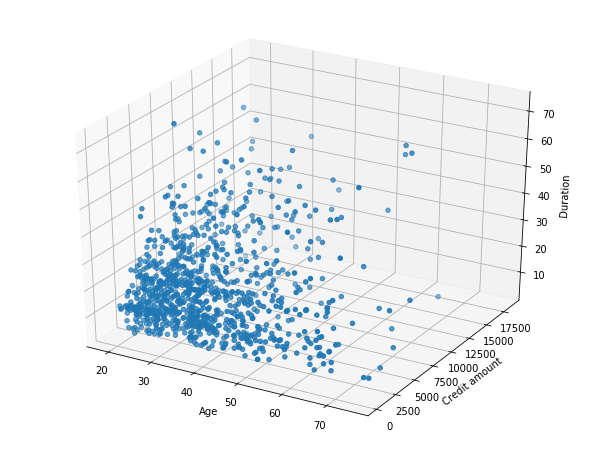

In [15]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

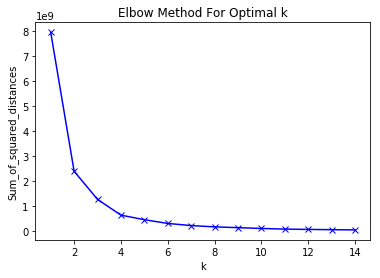

In [16]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Sum_of_squared_distances above, conclude that k=4

In [17]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[   35.61029412  1471.31066176    15.08272059]
 [   36.66666667 12511.71428571    40.26190476]
 [   34.68309859  3587.30633803    23.49295775]
 [   36.8         7127.52307692    33.34615385]]


In [19]:
print(kmeans.labels_)

[0 3 0 3 2 3 2 3 2 2 0 2 0 0 0 0 0 3 1 2 0 2 0 0 0 0 0 0 0 3 0 2 3 0 0 2 3
 0 0 0 0 0 3 3 3 0 0 0 3 0 0 3 0 2 0 0 3 3 0 3 0 0 0 1 2 2 0 0 0 0 3 0 0 3
 0 0 2 2 3 2 3 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 0 2 0 3 0 0 0 0 0 1 3 3 3 0 0
 0 3 3 0 2 3 0 2 0 0 2 0 0 0 0 0 0 0 2 3 3 2 0 1 0 3 0 2 0 0 2 2 0 0 2 0 0
 3 0 0 0 3 3 3 0 0 0 2 0 2 0 0 3 0 2 0 0 2 0 0 0 0 0 2 3 2 0 0 0 3 2 0 2 0
 0 2 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 0 0 1 0 0 3 0 2 2 2 0 2 0 2 2 2 0 0 0
 0 2 2 2 1 3 0 2 2 0 0 0 0 0 1 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 3 2 0 2
 0 0 0 2 2 0 0 3 0 3 0 2 0 1 2 1 2 0 0 2 0 2 0 0 0 2 1 2 3 0 0 0 3 3 2 3 1
 2 0 0 2 0 2 0 0 1 0 2 0 0 0 3 3 2 0 0 2 0 2 0 2 2 0 2 2 0 2 3 0 2 0 3 0 3
 1 2 2 0 0 2 0 3 2 2 2 2 0 0 2 0 0 0 0 2 3 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2
 2 3 0 1 1 3 0 0 1 0 0 1 0 0 2 0 0 3 0 0 0 0 2 0 0 1 2 0 0 0 0 0 3 0 2 0 0
 0 2 0 0 3 0 0 0 3 2 3 2 0 2 0 0 0 2 2 2 0 0 0 2 1 0 0 0 0 0 0 2 0 0 0 2 0
 2 0 0 2 0 0 1 0 2 2 2 2 2 2 0 2 2 0 2 0 0 2 0 3 2 2 2 0 0 0 0 2 2 2 0 0 2
 0 2 0 0 0 2 2 0 2 0 3 0 

In [20]:
#Input cluster to dataset
data['cluster'] = kmeans.labels_
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,male,2,own,defaultfill,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,3
2,49,male,1,own,little,defaultfill,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,3
4,53,male,2,free,little,little,4870,24,car,2
5,35,male,1,free,defaultfill,defaultfill,9055,36,education,3
6,53,male,2,own,quite rich,defaultfill,2835,24,furniture/equipment,2
7,35,male,3,rent,little,moderate,6948,36,car,3
8,61,male,1,own,rich,defaultfill,3059,12,radio/TV,2
9,28,male,3,own,little,moderate,5234,30,car,2


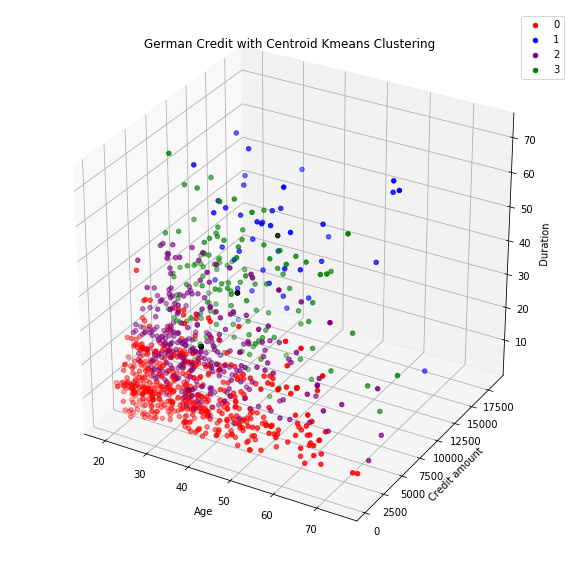

In [21]:
# Visualization of centroid
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','purple','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid Kmeans Clustering")
plt.show()


## Summary for K-Means Clustering

In [22]:
data0=data[(data.cluster==0)]
data1=data[(data.cluster==1)]
data2=data[(data.cluster==2)]
data3=data[(data.cluster==3)]

In [23]:
data0

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,male,2,own,defaultfill,little,1169,6,radio/TV,0
2,49,male,1,own,little,defaultfill,2096,12,education,0
10,25,female,2,rent,little,moderate,1295,12,car,0
12,22,female,2,own,little,moderate,1567,12,radio/TV,0
13,60,male,1,own,little,little,1199,24,car,0
14,28,female,2,rent,little,little,1403,15,car,0
15,32,female,1,own,moderate,little,1282,24,radio/TV,0
16,53,male,2,own,defaultfill,defaultfill,2424,24,radio/TV,0
20,48,male,2,own,little,defaultfill,2134,9,car,0
22,48,male,1,rent,little,little,2241,10,car,0


Text(0.5,1,'Age for Cluster 0')

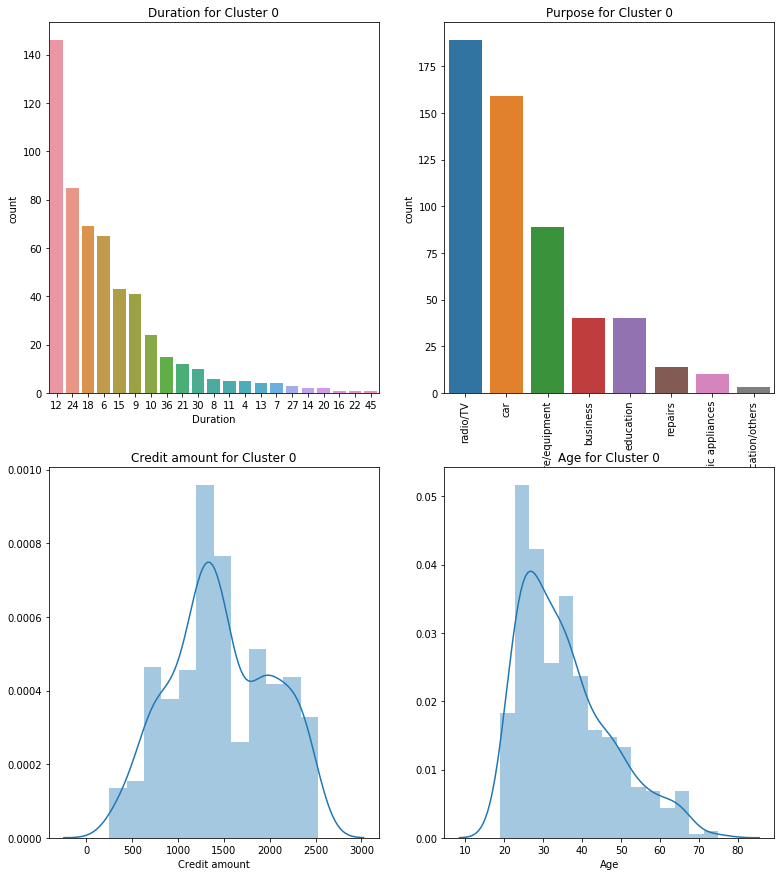

In [68]:
f=plt.figure(figsize=(13,15))


f.add_subplot(2,2,1)
sns.countplot(data0['Duration'], order=data0['Duration'].value_counts().index)
plt.title("Duration for Cluster 0")


f.add_subplot(2,2,2)
sns.countplot(data0['Purpose'],order=data0['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 0")
plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data0['Credit amount'])
plt.title("Credit amount for Cluster 0")
#plt.xticks(rotation=90)


f.add_subplot(2,2,4)
sns.distplot(data0['Age'])
plt.title("Age for Cluster 0")
#plt.xticks(rotation=90)

Note: Low risk ;
- Low Credit amount
- Age less than 50 (mostly)
- Short duration of paying credit
- Purpose only for car and TV Cable

Treatment :
- Giving another credit

In [24]:
data1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
18,44,female,3,free,little,moderate,12579,24,car,1
63,25,male,2,own,little,moderate,14421,48,business,1
87,47,male,2,free,moderate,moderate,12612,36,education,1
95,58,male,2,rent,little,moderate,15945,54,business,1
105,39,male,3,own,little,moderate,11938,24,vacation/others,1
134,21,female,2,own,moderate,defaultfill,10144,60,radio/TV,1
205,38,male,3,free,little,little,10623,30,car,1
226,27,male,2,own,rich,moderate,10961,48,radio/TV,1
236,23,male,0,own,defaultfill,moderate,14555,6,car,1
272,36,male,3,free,defaultfill,moderate,12169,48,car,1


Text(0.5,1,'Age for Cluster 1')

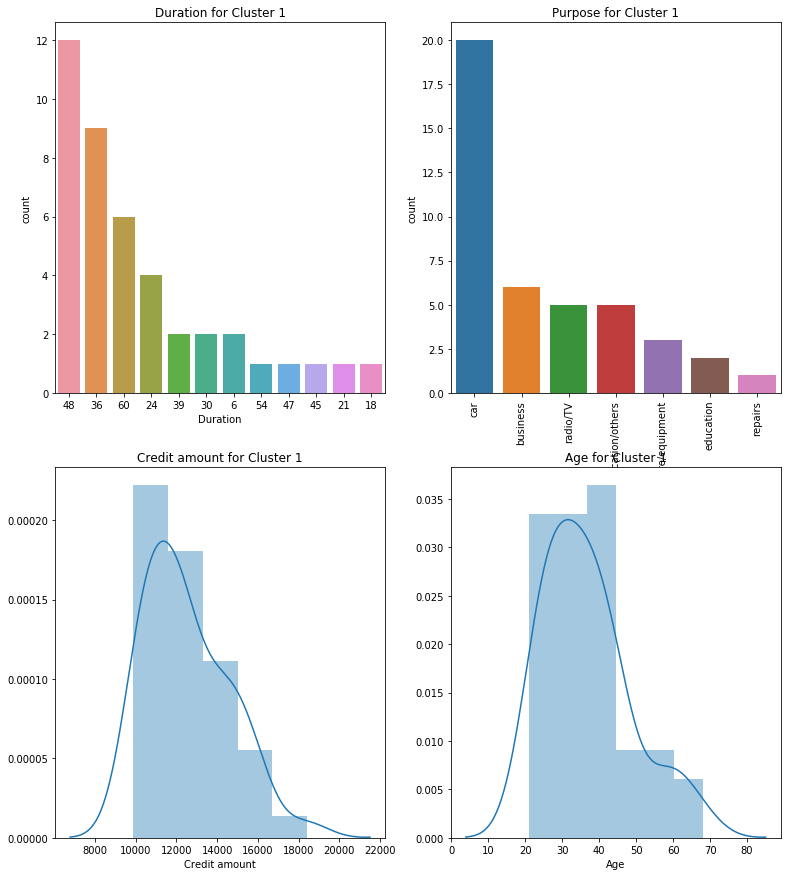

In [66]:
f=plt.figure(figsize=(13,15))


f.add_subplot(2,2,1)
sns.countplot(data1['Duration'], order=data1['Duration'].value_counts().index)
plt.title("Duration for Cluster 1")


f.add_subplot(2,2,2)
sns.countplot(data1['Purpose'],order=data1['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 1")
plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data1['Credit amount'])
plt.title("Credit amount for Cluster 1")
#plt.xticks(rotation=90)


f.add_subplot(2,2,4)
sns.distplot(data1['Age'])
plt.title("Age for Cluster 1")
#plt.xticks(rotation=90)

Note: High risk ;
- High Credit amount
- Age less than 40 (mostly)
- Long duration of paying credit
- Purpose only for car

Treatment :
- Giving notification about payment

In [25]:
data2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
4,53,male,2,free,little,little,4870,24,car,2
6,53,male,2,own,quite rich,defaultfill,2835,24,furniture/equipment,2
8,61,male,1,own,rich,defaultfill,3059,12,radio/TV,2
9,28,male,3,own,little,moderate,5234,30,car,2
11,24,female,2,rent,little,little,4308,48,business,2
19,31,male,2,own,quite rich,defaultfill,3430,24,radio/TV,2
21,44,male,2,rent,quite rich,little,2647,6,radio/TV,2
31,27,male,2,own,little,little,4020,24,furniture/equipment,2
35,25,male,1,own,little,moderate,4746,45,radio/TV,2
53,31,male,2,own,defaultfill,defaultfill,3378,18,car,2


Text(0.5,1,'Age for Cluster 2')

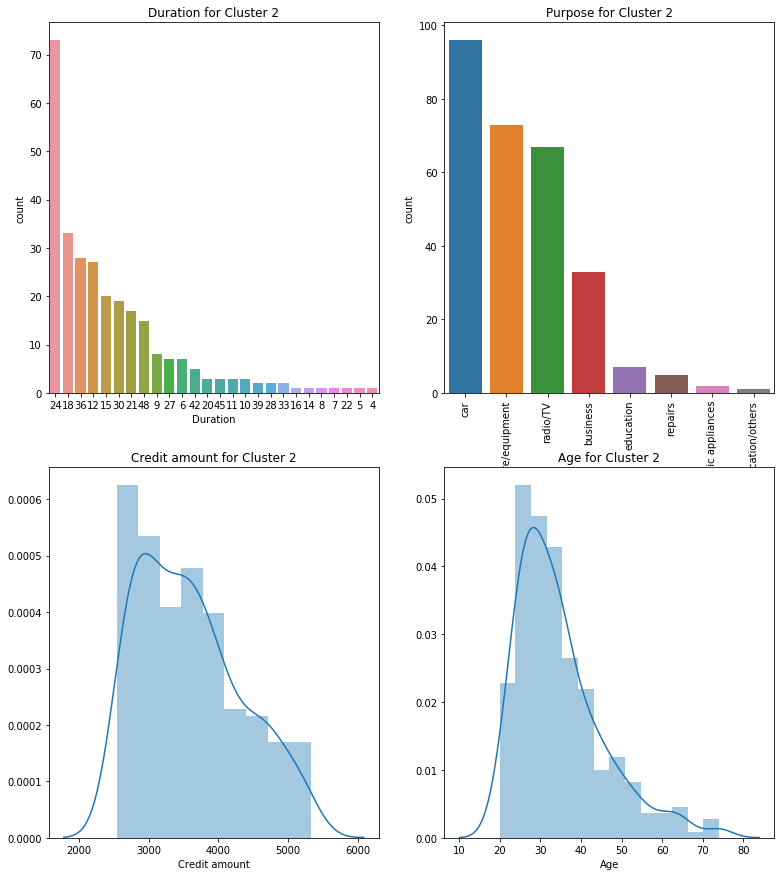

In [67]:
f=plt.figure(figsize=(13,15))


f.add_subplot(2,2,1)
sns.countplot(data2['Duration'], order=data2['Duration'].value_counts().index)
plt.title("Duration for Cluster 2")


f.add_subplot(2,2,2)
sns.countplot(data2['Purpose'],order=data2['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 2")
plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data2['Credit amount'])
plt.title("Credit amount for Cluster 2")
#plt.xticks(rotation=90)


f.add_subplot(2,2,4)
sns.distplot(data2['Age'])
plt.title("Age for Cluster 2")
#plt.xticks(rotation=90)

Note: Medium risk ;
- Low Credit amount
- Age less than 40 (mostly)
- Medium duration of paying credit
- Purpose only for car and Furniture

Treatment :
- Giving another credit
- Giving notification about payment

In [55]:
data3

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
4,53,male,2,free,little,little,4870,24,car,3
6,53,male,2,own,quite rich,defaultfill,2835,24,furniture/equipment,3
8,61,male,1,own,rich,defaultfill,3059,12,radio/TV,3
9,28,male,3,own,little,moderate,5234,30,car,3
11,24,female,2,rent,little,little,4308,48,business,3
19,31,male,2,own,quite rich,defaultfill,3430,24,radio/TV,3
21,44,male,2,rent,quite rich,little,2647,6,radio/TV,3
31,27,male,2,own,little,little,4020,24,furniture/equipment,3
35,25,male,1,own,little,moderate,4746,45,radio/TV,3
53,31,male,2,own,defaultfill,defaultfill,3378,18,car,3


Text(0.5,1,'Age for Cluster 3')

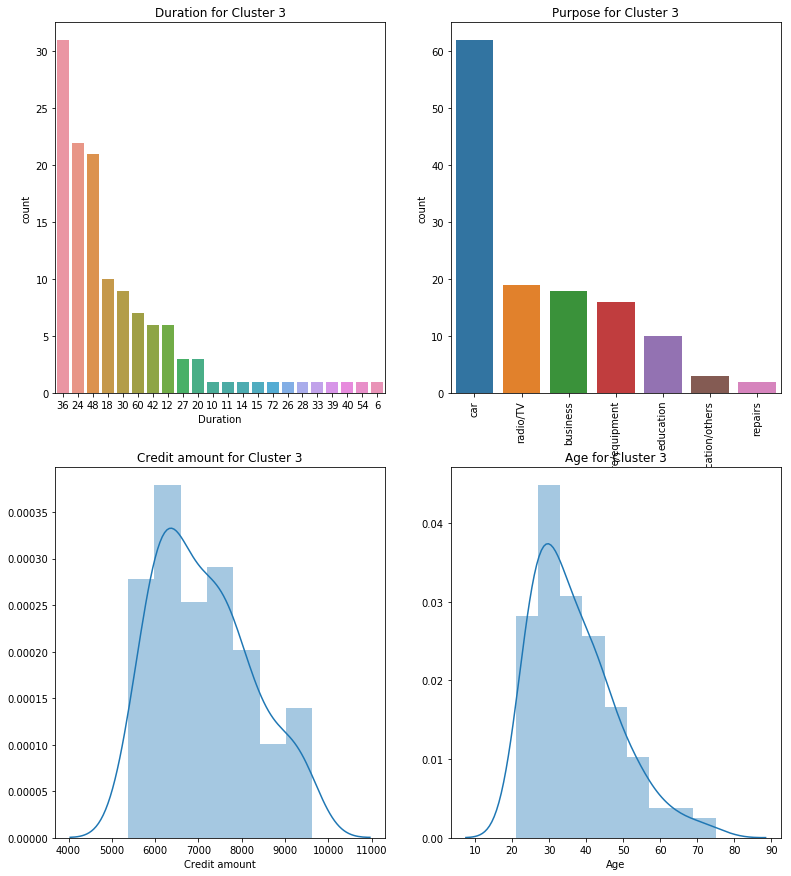

In [70]:
f=plt.figure(figsize=(13,15))


f.add_subplot(2,2,1)
sns.countplot(data3['Duration'], order=data3['Duration'].value_counts().index)
plt.title("Duration for Cluster 3")


f.add_subplot(2,2,2)
sns.countplot(data3['Purpose'],order=data3['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 3")
plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data3['Credit amount'])
plt.title("Credit amount for Cluster 3")
#plt.xticks(rotation=90)


f.add_subplot(2,2,4)
sns.distplot(data3['Age'])
plt.title("Age for Cluster 3")
#plt.xticks(rotation=90)

Note: Medium risk ;
- Medium Credit amount
- Age less than 40 (mostly)
- Short-Long duration of paying credit
- Purpose for car

Treatment :
- Giving another credit
- Giving notification about payment

## Analyze in each cluster

### Duration

Text(0.5,1,'Duration for Cluster 3')

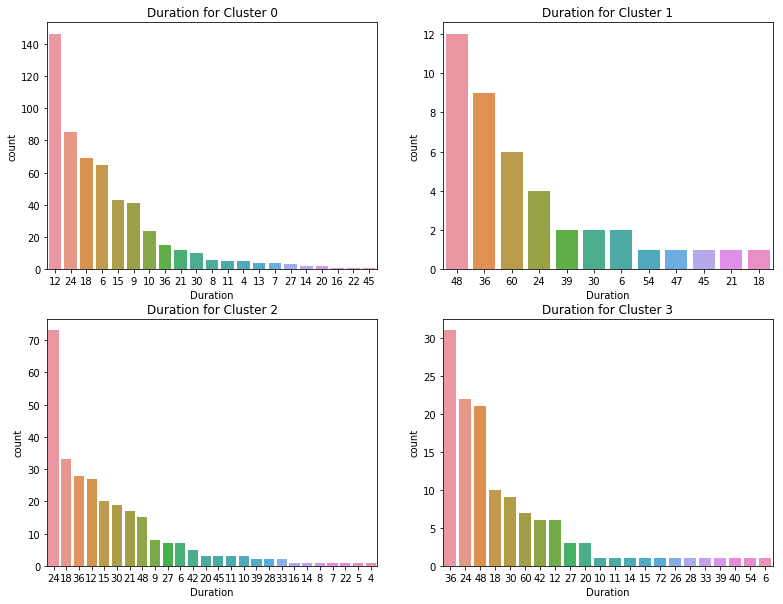

In [41]:
f=plt.figure(figsize=(13,10))
f.add_subplot(2,2,1)
sns.countplot(data0['Duration'], order=data0['Duration'].value_counts().index)
plt.title("Duration for Cluster 0")

f.add_subplot(2,2,2)
sns.countplot(data1['Duration'],order=data1['Duration'].value_counts().index)
plt.title("Duration for Cluster 1")

f.add_subplot(2,2,3)
sns.countplot(data2['Duration'],order=data2['Duration'].value_counts().index)
plt.title("Duration for Cluster 2")

f.add_subplot(2,2,4)
sns.countplot(data3['Duration'], order=data3['Duration'].value_counts().index)
plt.title("Duration for Cluster 3")

### Purpose

In [42]:
data0_purpose=pd.DataFrame(data0['Purpose'].value_counts())
data1_purpose=pd.DataFrame(data1['Purpose'].value_counts())
data2_purpose=pd.DataFrame(data2['Purpose'].value_counts())
data3_purpose=pd.DataFrame(data3['Purpose'].value_counts())

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

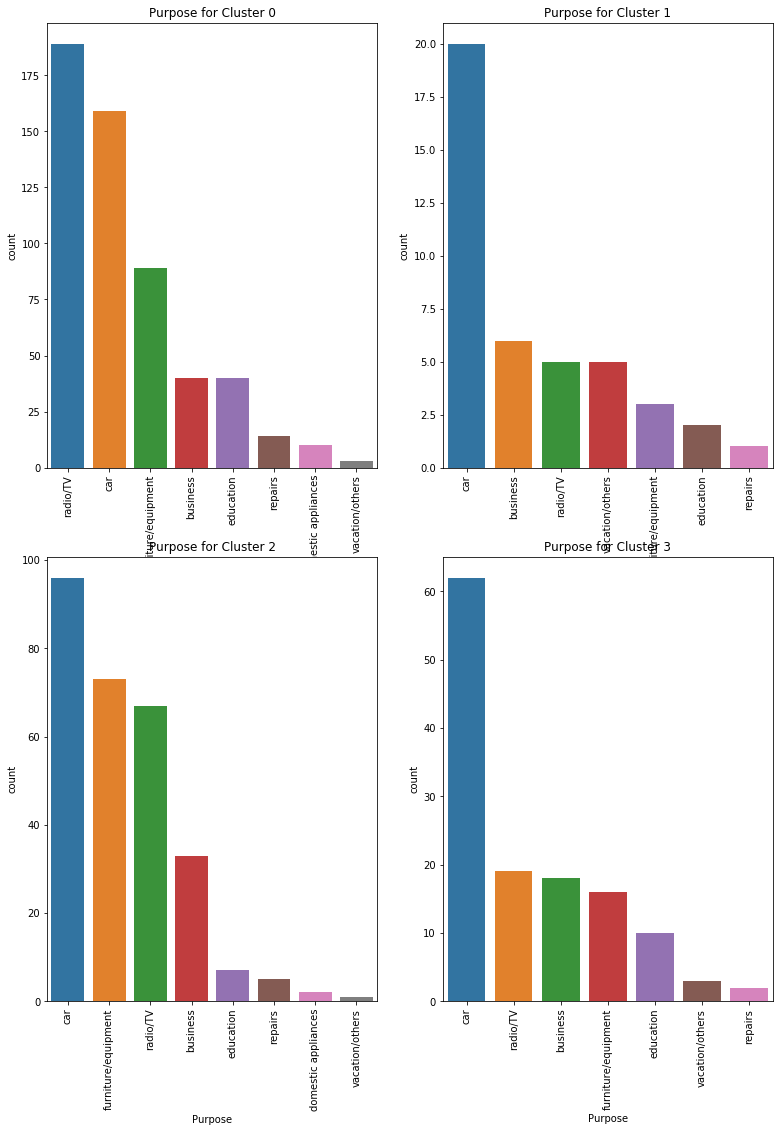

In [69]:
f=plt.figure(figsize=(13,18))
f.add_subplot(2,2,1)
sns.countplot(data0['Purpose'],order=data0['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 0")
plt.xticks(rotation=90)

f.add_subplot(2,2,2)
sns.countplot(data1['Purpose'],order=data1['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 1")
plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.countplot(data2['Purpose'],order=data2['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 2")
plt.xticks(rotation=90)

f.add_subplot(2,2,4)
sns.countplot(data3['Purpose'], order=data3['Purpose'].value_counts().index)
plt.title("Purpose for Cluster 3")
plt.xticks(rotation=90)


### Credit Amount

In [47]:
data0['Credit amount'].describe()

count     544.000000
mean     1471.310662
std       549.109409
min       250.000000
25%      1102.500000
50%      1410.000000
75%      1925.500000
max      2528.000000
Name: Credit amount, dtype: float64

In [52]:
data1['Credit amount'].describe()

count       42.000000
mean     12511.714286
std       2046.784549
min       9857.000000
25%      10896.500000
50%      12083.500000
75%      14141.000000
max      18424.000000
Name: Credit amount, dtype: float64

In [53]:
data2['Credit amount'].describe()

count     284.000000
mean     3587.306338
std       740.383757
min      2538.000000
25%      2975.750000
50%      3504.000000
75%      4042.000000
max      5324.000000
Name: Credit amount, dtype: float64

In [54]:
data3['Credit amount'].describe()

count     130.000000
mean     7127.523077
std      1110.262950
min      5371.000000
25%      6236.750000
50%      6957.500000
75%      7847.250000
max      9629.000000
Name: Credit amount, dtype: float64

Text(0.5,1,'Credit amount for Cluster 3')

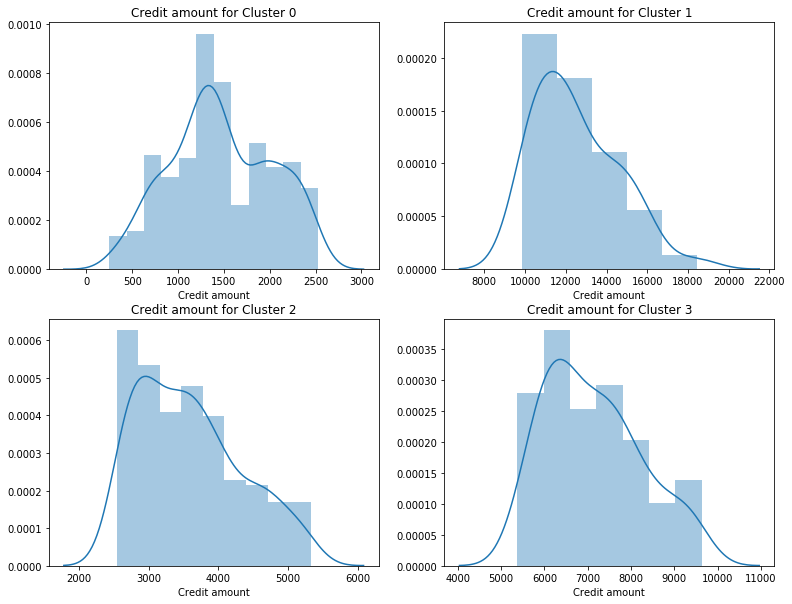

In [61]:
f=plt.figure(figsize=(13,10))
f.add_subplot(2,2,1)
sns.distplot(data0['Credit amount'])
plt.title("Credit amount for Cluster 0")
#plt.xticks(rotation=90)

f.add_subplot(2,2,2)
sns.distplot(data1['Credit amount'])
plt.title("Credit amount for Cluster 1")
#plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data2['Credit amount'])
plt.title("Credit amount for Cluster 2")
#plt.xticks(rotation=90)

f.add_subplot(2,2,4)
sns.distplot(data3['Credit amount'])
plt.title("Credit amount for Cluster 3")
#plt.xticks(rotation=90)


### Age

Text(0.5,1,'Age for Cluster 3')

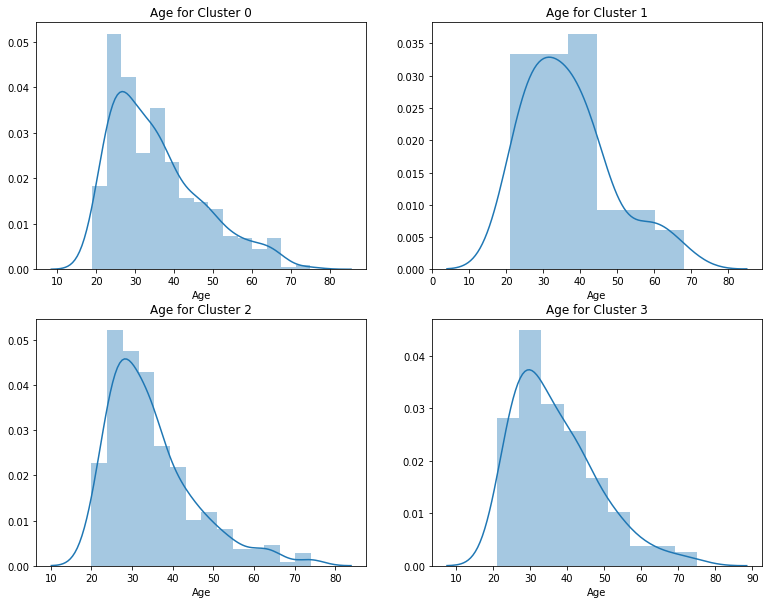

In [60]:
f=plt.figure(figsize=(13,10))
f.add_subplot(2,2,1)
sns.distplot(data0['Age'])
plt.title("Age for Cluster 0")
#plt.xticks(rotation=90)

f.add_subplot(2,2,2)
sns.distplot(data1['Age'])
plt.title("Age for Cluster 1")
#plt.xticks(rotation=90)

f.add_subplot(2,2,3)
sns.distplot(data2['Age'])
plt.title("Age for Cluster 2")
#plt.xticks(rotation=90)

f.add_subplot(2,2,4)
sns.distplot(data3['Age'])
plt.title("Age for Cluster 3")
#plt.xticks(rotation=90)